In [2]:
import sys
import matplotlib.pyplot as plt
sys.path.append("/home/n2401517d/my_workspace/HMC_NF")
from utils import get_icl_heatmap_cmap, set_icl_color_cycle, calculate_pair_correlation, plot_pair_correlation, plot_loss, plot_frequency_heatmap, generate_samples, calculate_pair_correlation, plot_pair_correlation, save_rdf_data, plot_acceptance_rate,plot_avg_free_energy, plot_well_statistics, plot_avg_x_coordinate,plot_multiple_avg_x_coordinates
set_icl_color_cycle()
import numpy as np
cmap_div = get_icl_heatmap_cmap("diverging")
import numpy as np
import matplotlib.pyplot as plt
import json
import os

TeX rendering is available and enabled.


0.00
0.25
0.50
0.75
1.00


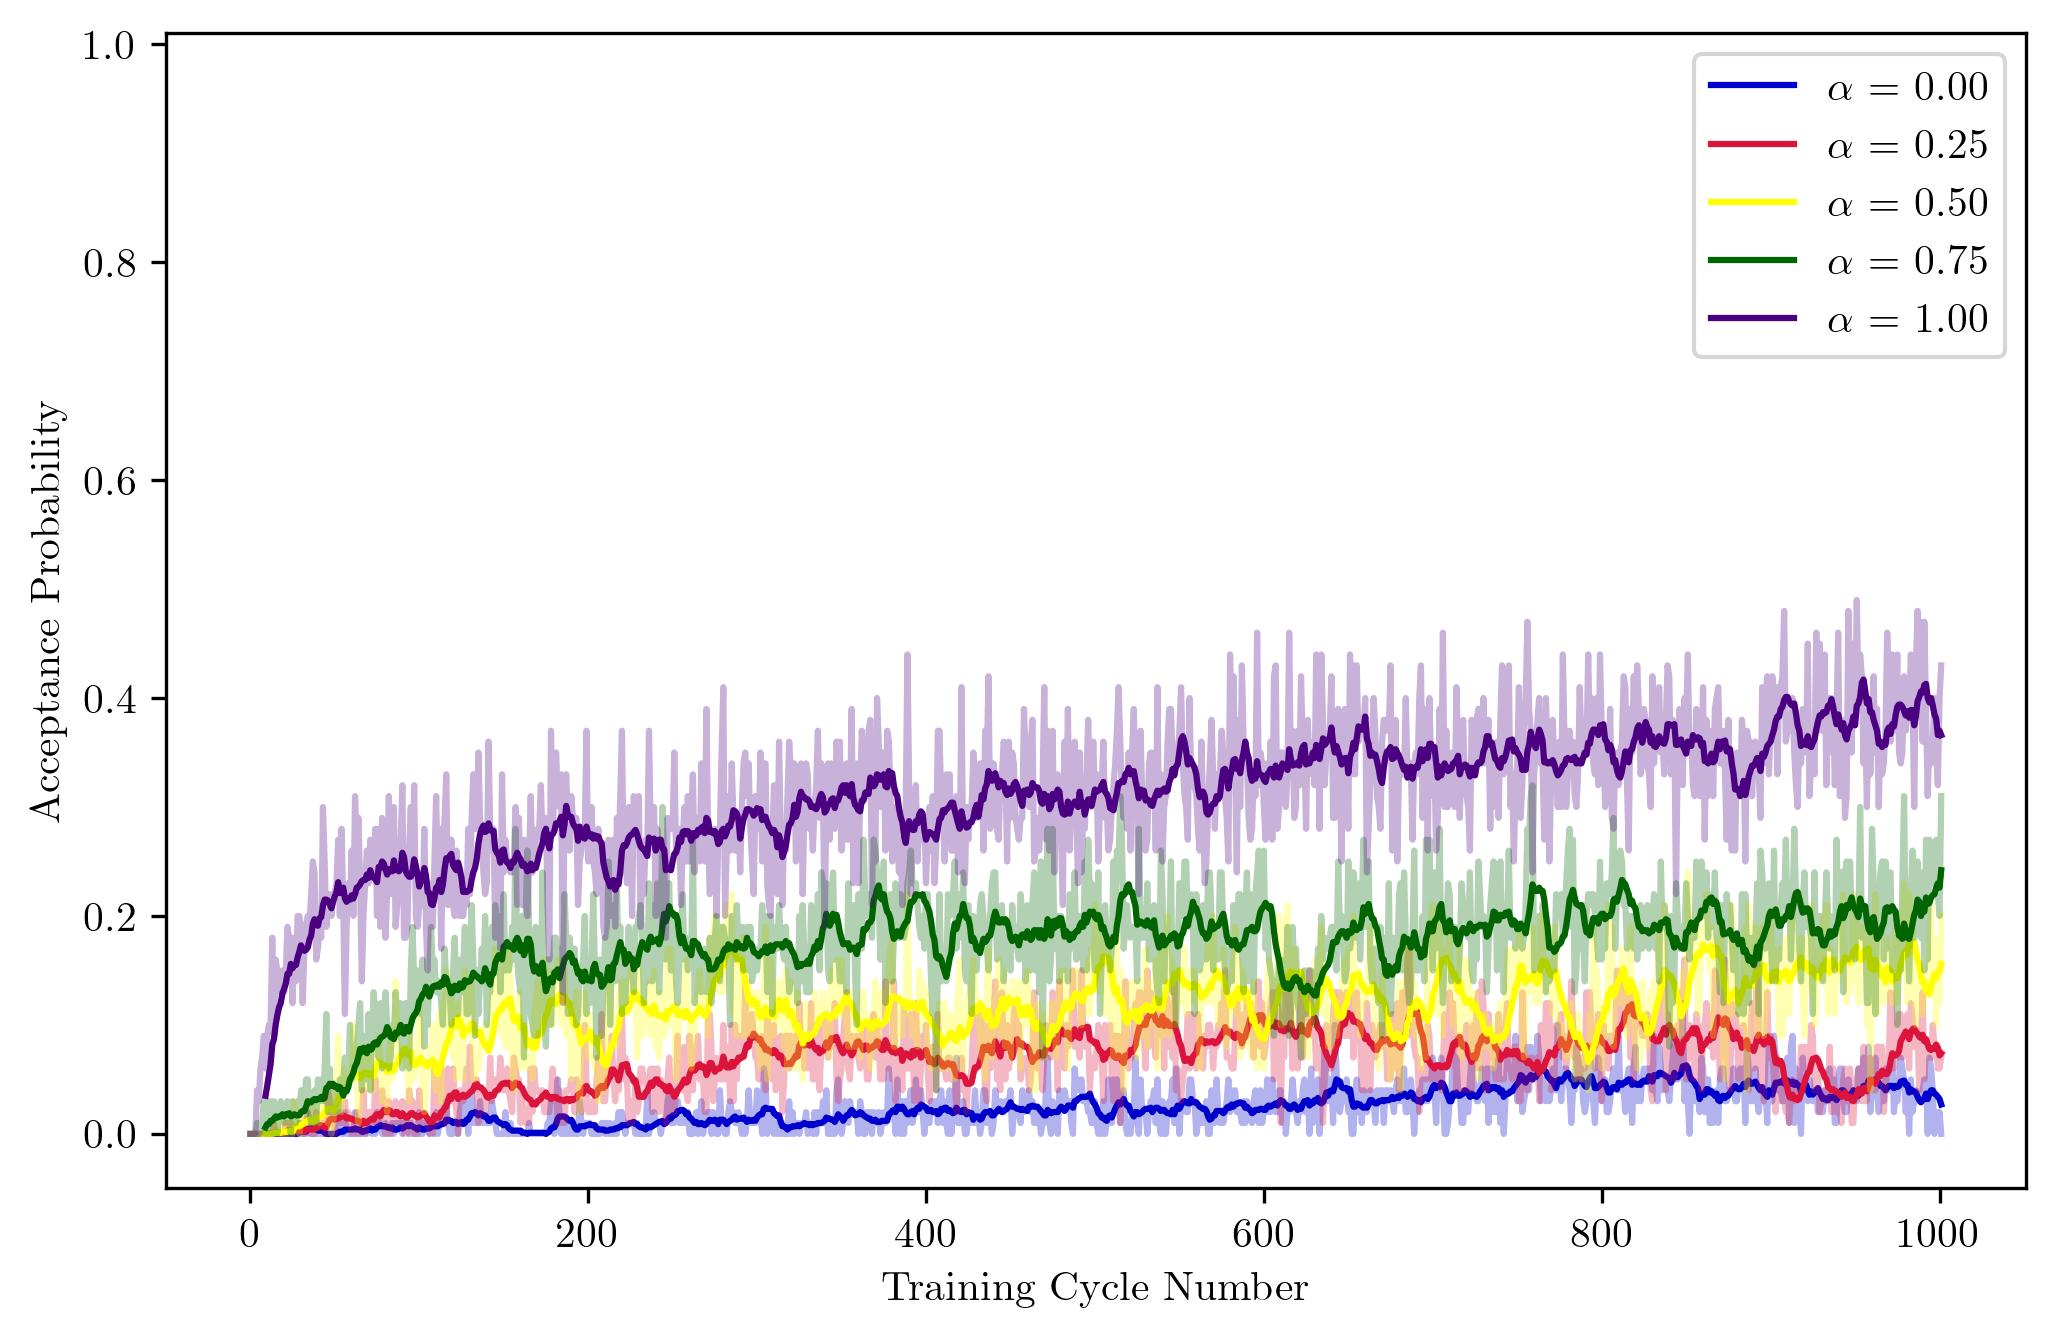

In [16]:
alpha_vals = ["0.00", "0.25", "0.50", "0.75", "1.00"]

for i in alpha_vals:
    acc_path = f"/home/n2401517d/my_workspace/HMC_NF/results/algo_2_1000_cycles_dV_0.5_alpha_{i}/nf_acceptance_rate_mcmc_steps_data.json"
    loss_path = f"/home/n2401517d/my_workspace/HMC_NF/results/algo_2_1000_cycles_dV_0.5_alpha_{i}/training/loss_function_data.json"
    heat_map_path = f"/home/n2401517d/my_workspace/HMC_NF/results/algo_2_1000_cycles_dV_0.5_alpha_{i}/training/frequency_heatmap_cycle_1000_data.json"
    samples_path = f"/home/n2401517d/my_workspace/HMC_NF/results/algo_2_1000_cycles_dV_0.5_alpha_{i}/training/samples.npy"

# Create plot that will contain all alpha values
plt.figure(figsize=(8, 5))

color_order = ["C0", "C1", "C4", "C6", "C7"]
window_size = 10  # Size of running average window

for i, color in zip(alpha_vals, color_order):
    print(i)
    # Load acceptance rate data for this alpha value
    acc_path = f"/home/n2401517d/my_workspace/HMC_NF/results/algo_2_1000_cycles_dV_0.5_alpha_{i}/nf_acceptance_rate_mcmc_steps_data.json"
    with open(acc_path, 'r') as f:
        acc_data = json.load(f)
        acc_rates = acc_data['p_acc_history']
        mcmc_steps = range(len(acc_rates))
        
        # Plot raw data with low alpha
        plt.plot(mcmc_steps, acc_rates, color=color, alpha=0.3)
        
        # Calculate and plot running average
        running_avg = np.convolve(acc_rates, np.ones(window_size)/window_size, mode='valid')
        running_avg_steps = mcmc_steps[window_size-1:]
        plt.plot(running_avg_steps, running_avg, color=color, label=f'$\\alpha$ = {i}')

plt.xlabel('Training Cycle Number')
plt.ylabel('Acceptance Probability') 
plt.ylim(-0.05, 1.01)
plt.grid(False)
plt.legend()

# Save plot
save_dir = "/home/n2401517d/my_workspace/HMC_NF/analysis"
# plt.savefig(f'{save_dir}/acceptance_rate_all_alphas.svg', bbox_inches='tight')
# plt.savefig(f'{save_dir}/acceptance_rate_all_alphas.png', bbox_inches='tight', format='png')
plt.show()



0.00
0.25
0.50
0.75
1.00


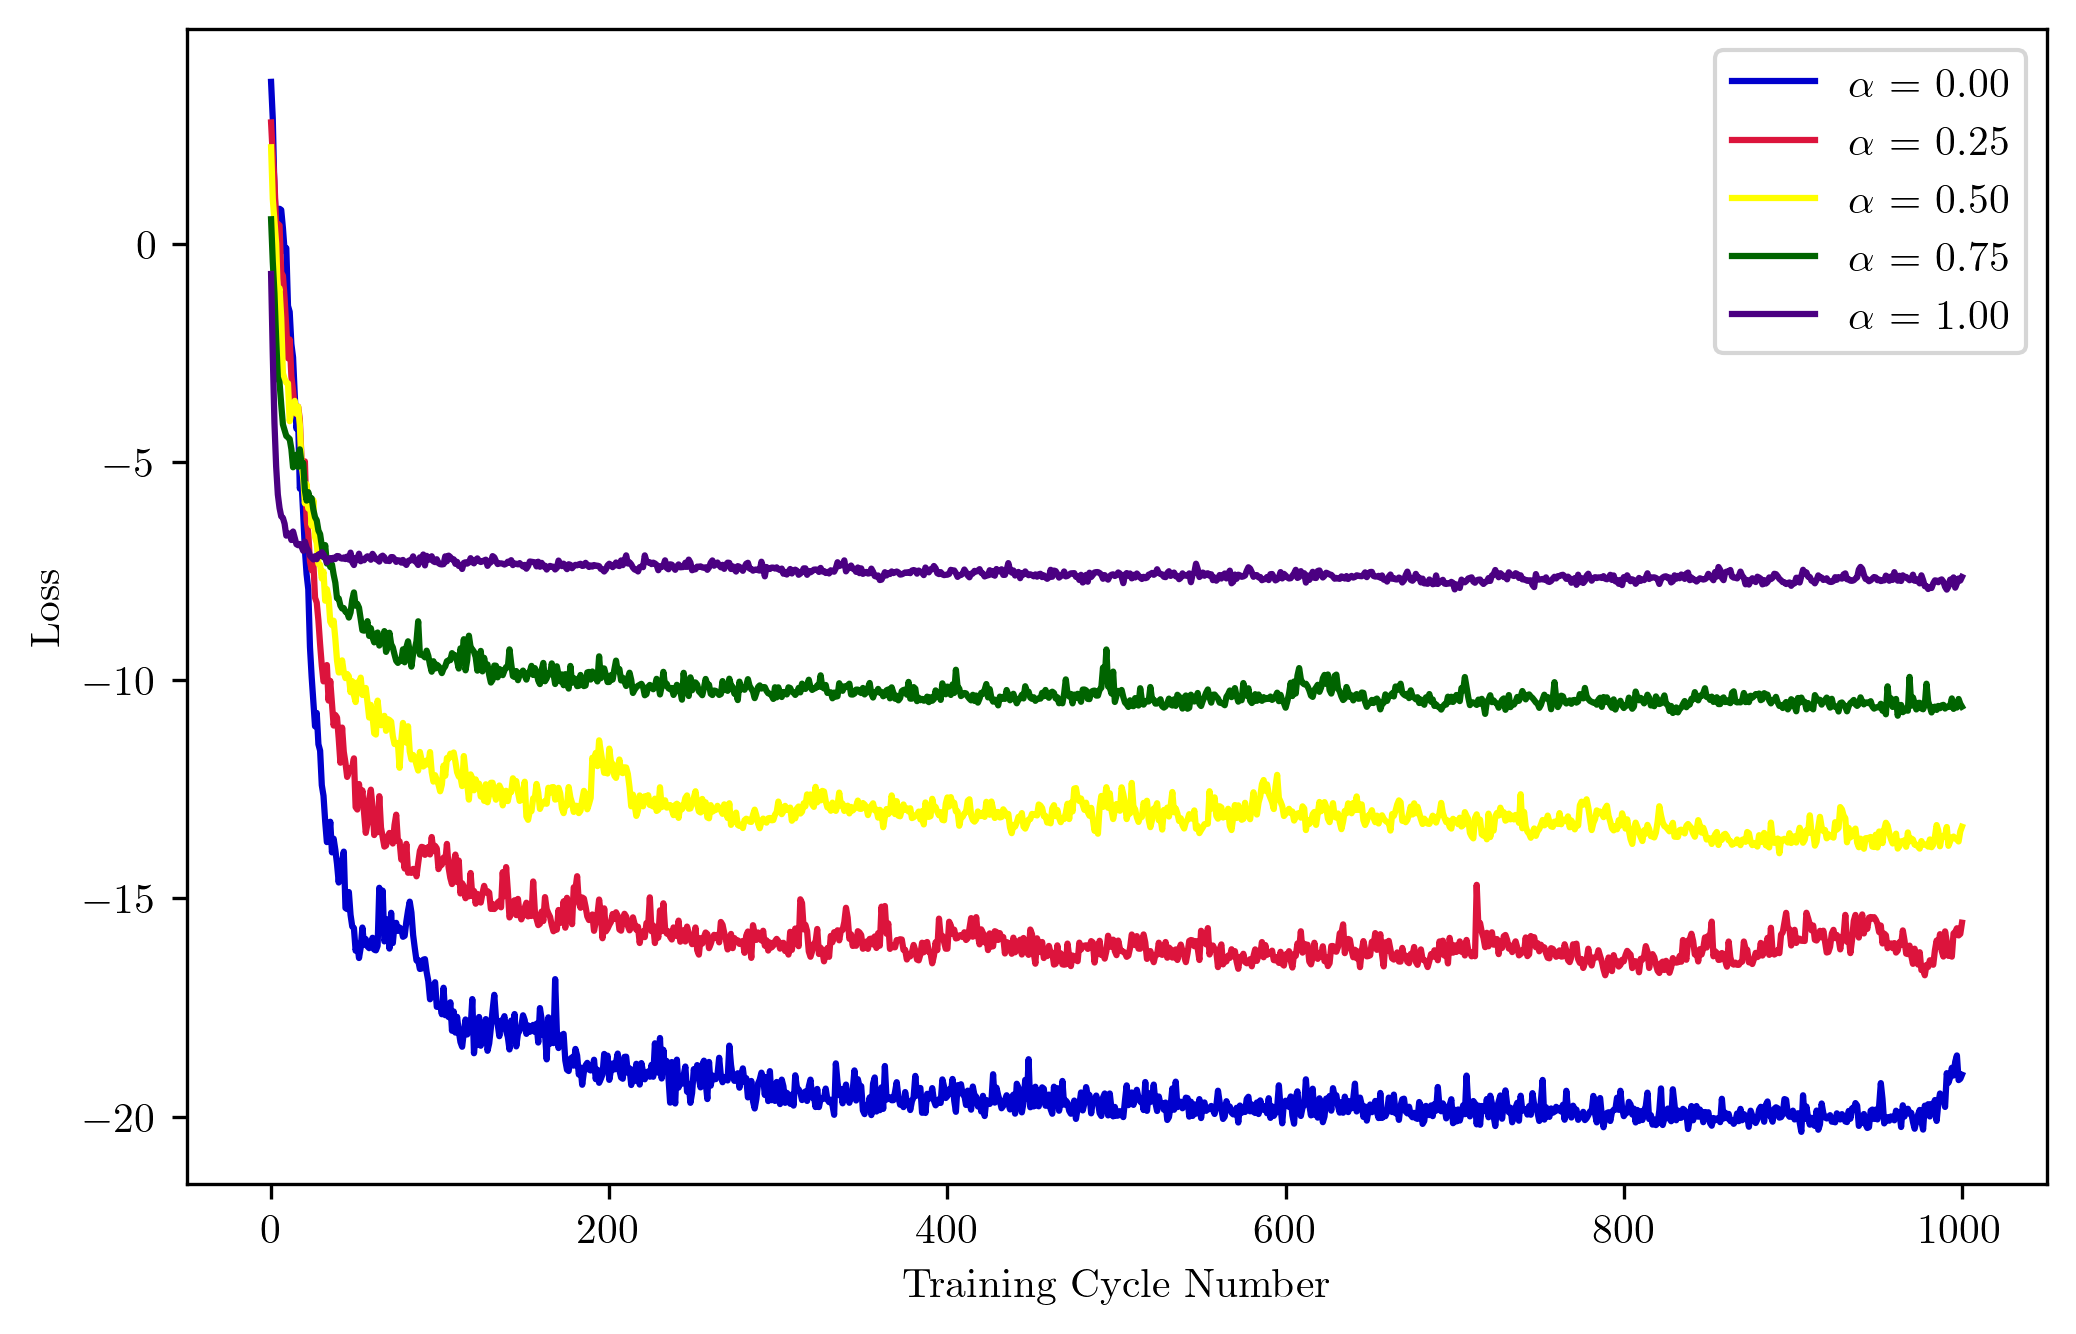

In [17]:
# Create plot that will contain all alpha values
plt.figure(figsize=(8, 5))

color_order = ["C0", "C1", "C4", "C6", "C7"]

for i, color in zip(alpha_vals, color_order):
    print(i)
    # Load loss data for this alpha value
    loss_path = f"/home/n2401517d/my_workspace/HMC_NF/results/algo_2_1000_cycles_dV_0.5_alpha_{i}/training/loss_function_data.json"
    with open(loss_path, 'r') as f:
        loss_data = json.load(f)
        losses = loss_data['loss_epoch']
        steps = range(len(losses))
        
        plt.plot(steps, losses, color=color, label=f'$\\alpha$ = {i}')

plt.xlabel('Training Cycle Number')
plt.ylabel('Loss') 
plt.grid(False)
plt.legend()

# Save plot
save_dir = "/home/n2401517d/my_workspace/HMC_NF/analysis"
# plt.savefig(f'{save_dir}/loss_all_alphas.svg', bbox_inches='tight')
# plt.savefig(f'{save_dir}/loss_all_alphas.png', bbox_inches='tight', format='png')
plt.show()


In [44]:
import sys
sys.path.append("/home/n2401517d/my_workspace/HMC_NF")
from utils import calculate_pair_correlation, plot_pair_correlation

alpha_vals = ["0.00", "0.25", "0.50", "0.75", "1.00"]

for i, color in zip(alpha_vals, color_order):
    print(i)
    # Load pair correlation data for this alpha value
    samples_path = f"/home/n2401517d/my_workspace/HMC_NF/results/algo_2_1000_cycles_dV_0.5_alpha_{i}/training/samples.npy"
    samples = np.load(samples_path)
    r_vals, g_r = calculate_pair_correlation(samples, n_particles=3, bound=5.0, dr=0.1)

    plot_pair_correlation(r_vals, g_r, base_filename="pair_correlation_function_1000", directory=f"/home/n2401517d/my_workspace/HMC_NF/results/algo_2_1000_cycles_dV_0.5_alpha_{i}/training/")


0.00


Calculating pair correlation: 100%|██████████| 50000/50000 [00:02<00:00, 21567.46it/s]


0.25


Calculating pair correlation: 100%|██████████| 50000/50000 [00:02<00:00, 21548.73it/s]


0.50


Calculating pair correlation: 100%|██████████| 50000/50000 [00:02<00:00, 21638.07it/s]


0.75


Calculating pair correlation: 100%|██████████| 50000/50000 [00:02<00:00, 21477.82it/s]


1.00


Calculating pair correlation: 100%|██████████| 50000/50000 [00:02<00:00, 21730.26it/s]


0.00
Peak max for sample size 0.00: 2.489366698369034 at r = 1.3
0.25
Peak max for sample size 0.25: 3.5673342622268707 at r = 1.2000000000000002
0.50
Peak max for sample size 0.50: 4.173396285520807 at r = 1.2000000000000002
0.75
Peak max for sample size 0.75: 4.183016317636584 at r = 1.2000000000000002
1.00
Peak max for sample size 1.00: 4.866604482098843 at r = 0.0


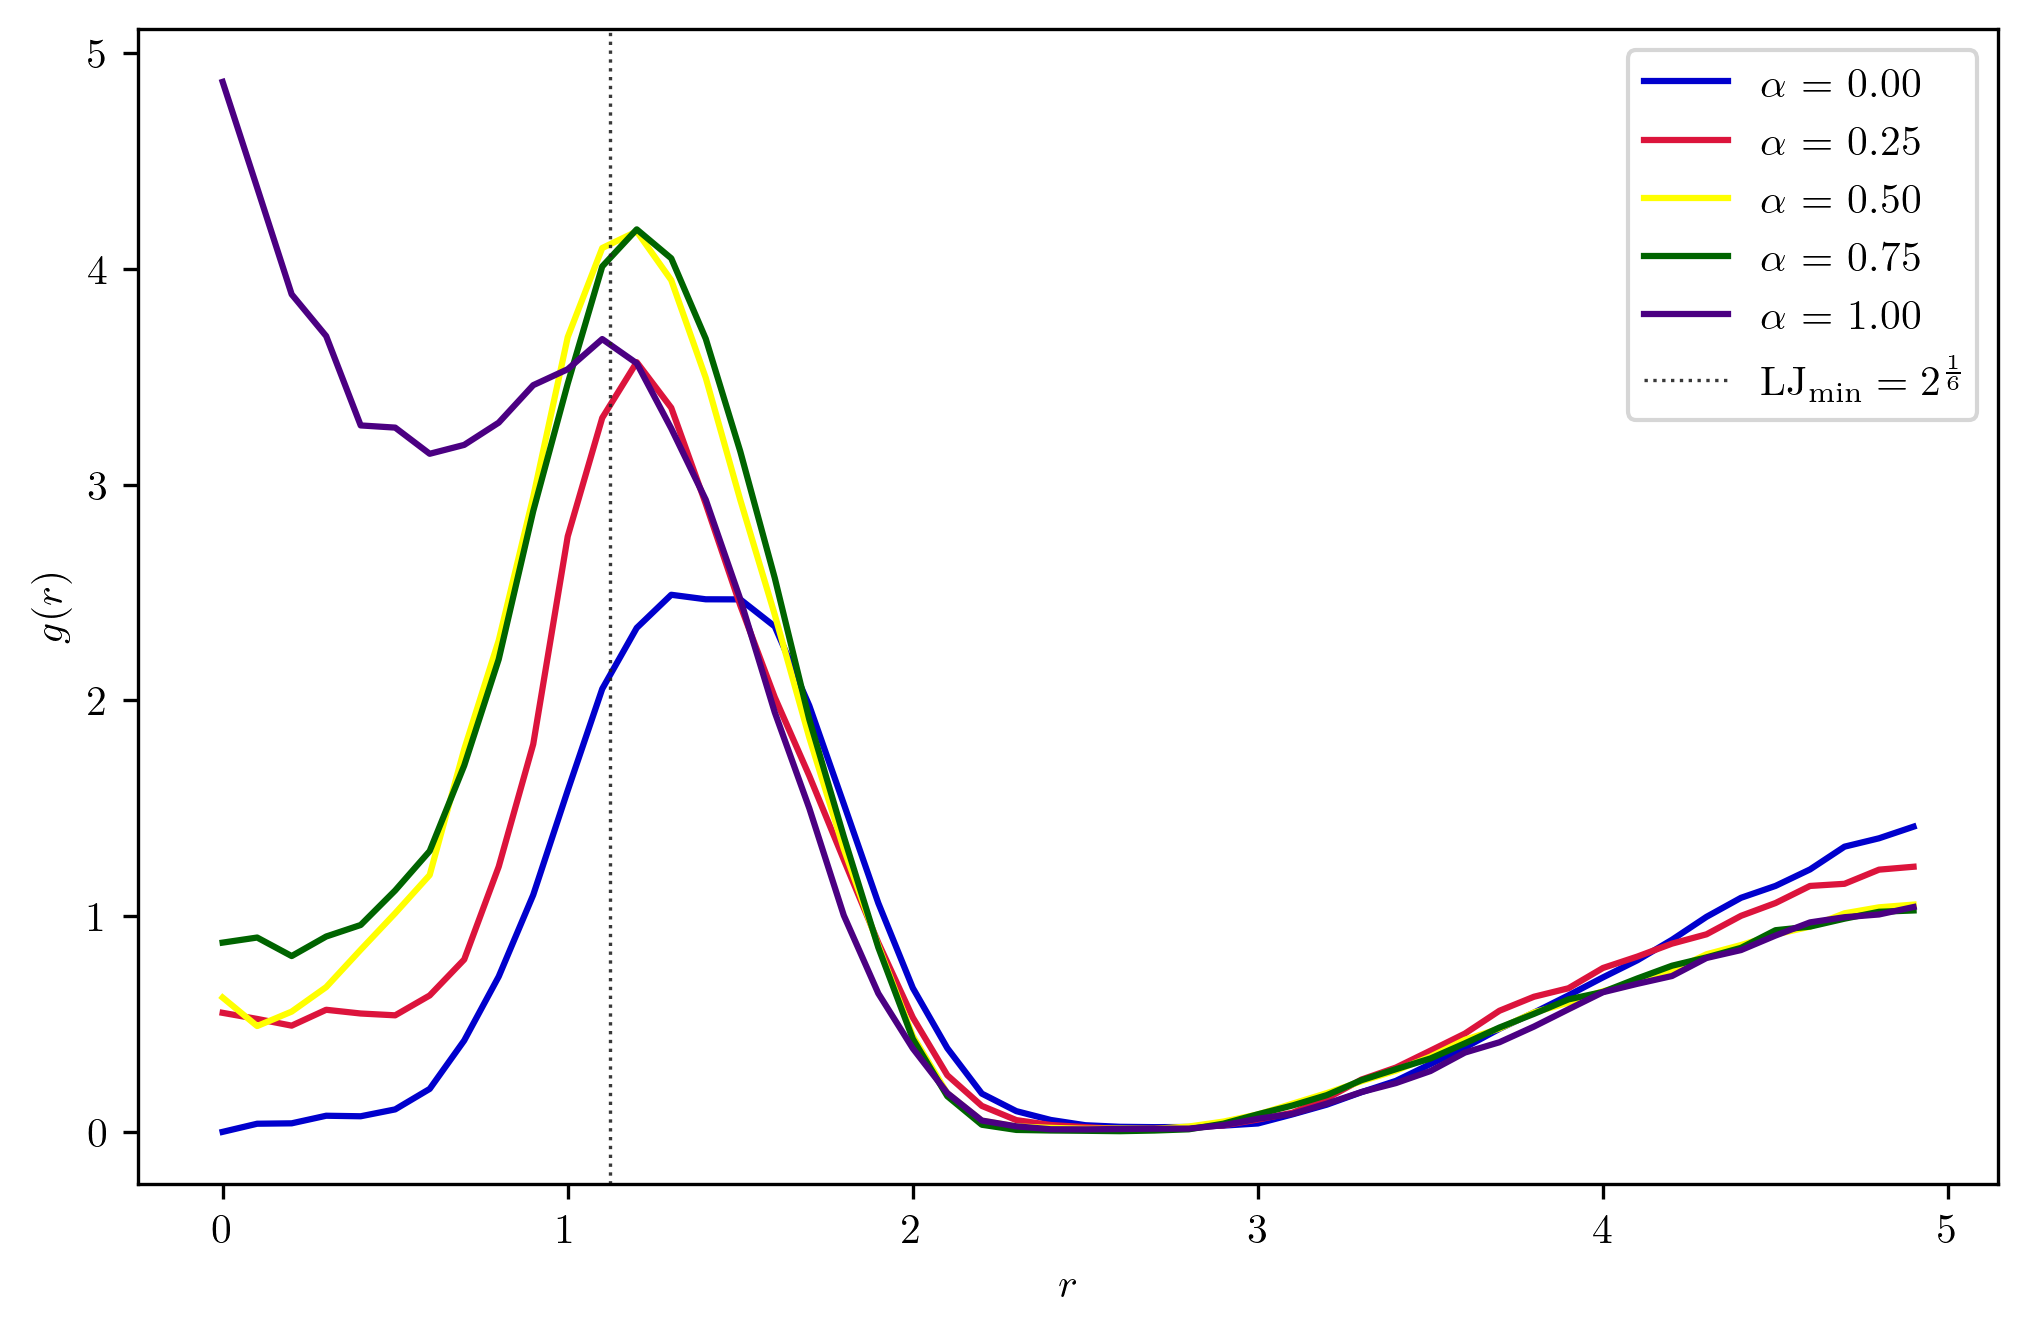

In [4]:
# Create plot that will contain all alpha values
plt.figure(figsize=(8, 5))

alpha_vals = ["0.00", "0.25", "0.50", "0.75", "1.00"]

color_order = ["C0", "C1", "C4", "C6", "C7"]

for i, color in zip(alpha_vals, color_order):
    print(i)
    # Load pair correlation data for this alpha value
    pair_corr_path = f"/home/n2401517d/my_workspace/HMC_NF/results/algo_2_1000_cycles_dV_0.5_alpha_{i}/training/pair_correlation_function_1000_data.json"
    with open(pair_corr_path, 'r') as f:
        pair_corr_data = json.load(f)
        r_vals = np.array(pair_corr_data['r'])
        g_r = np.array(pair_corr_data['g_r'])
        
        plt.plot(r_vals, g_r, color=color, label=f'$\\alpha$ = {i}')
        
        peak_max = np.max(g_r)
        peak_max_r = r_vals[np.argmax(g_r)]
        print(f"Peak max for sample size {i}: {peak_max} at r = {peak_max_r}")
        
plt.axvline(x=2**(1/6), color='C11', linestyle=':', linewidth=0.8, alpha=0.9, label=r'$\mathrm{LJ}_{\mathrm{min}}=2^{\frac{1}{6}}$')

plt.xlabel(r'$r$')
plt.ylabel(r'$g(r)$')
plt.grid(False)
plt.legend()

# Save plot
save_dir = "/home/n2401517d/my_workspace/HMC_NF/analysis"
# plt.savefig(f'{save_dir}/pair_correlation_all_alphas.svg', bbox_inches='tight')
# plt.savefig(f'{save_dir}/pair_correlation_all_alphas.png', bbox_inches='tight', format='png')
plt.show()


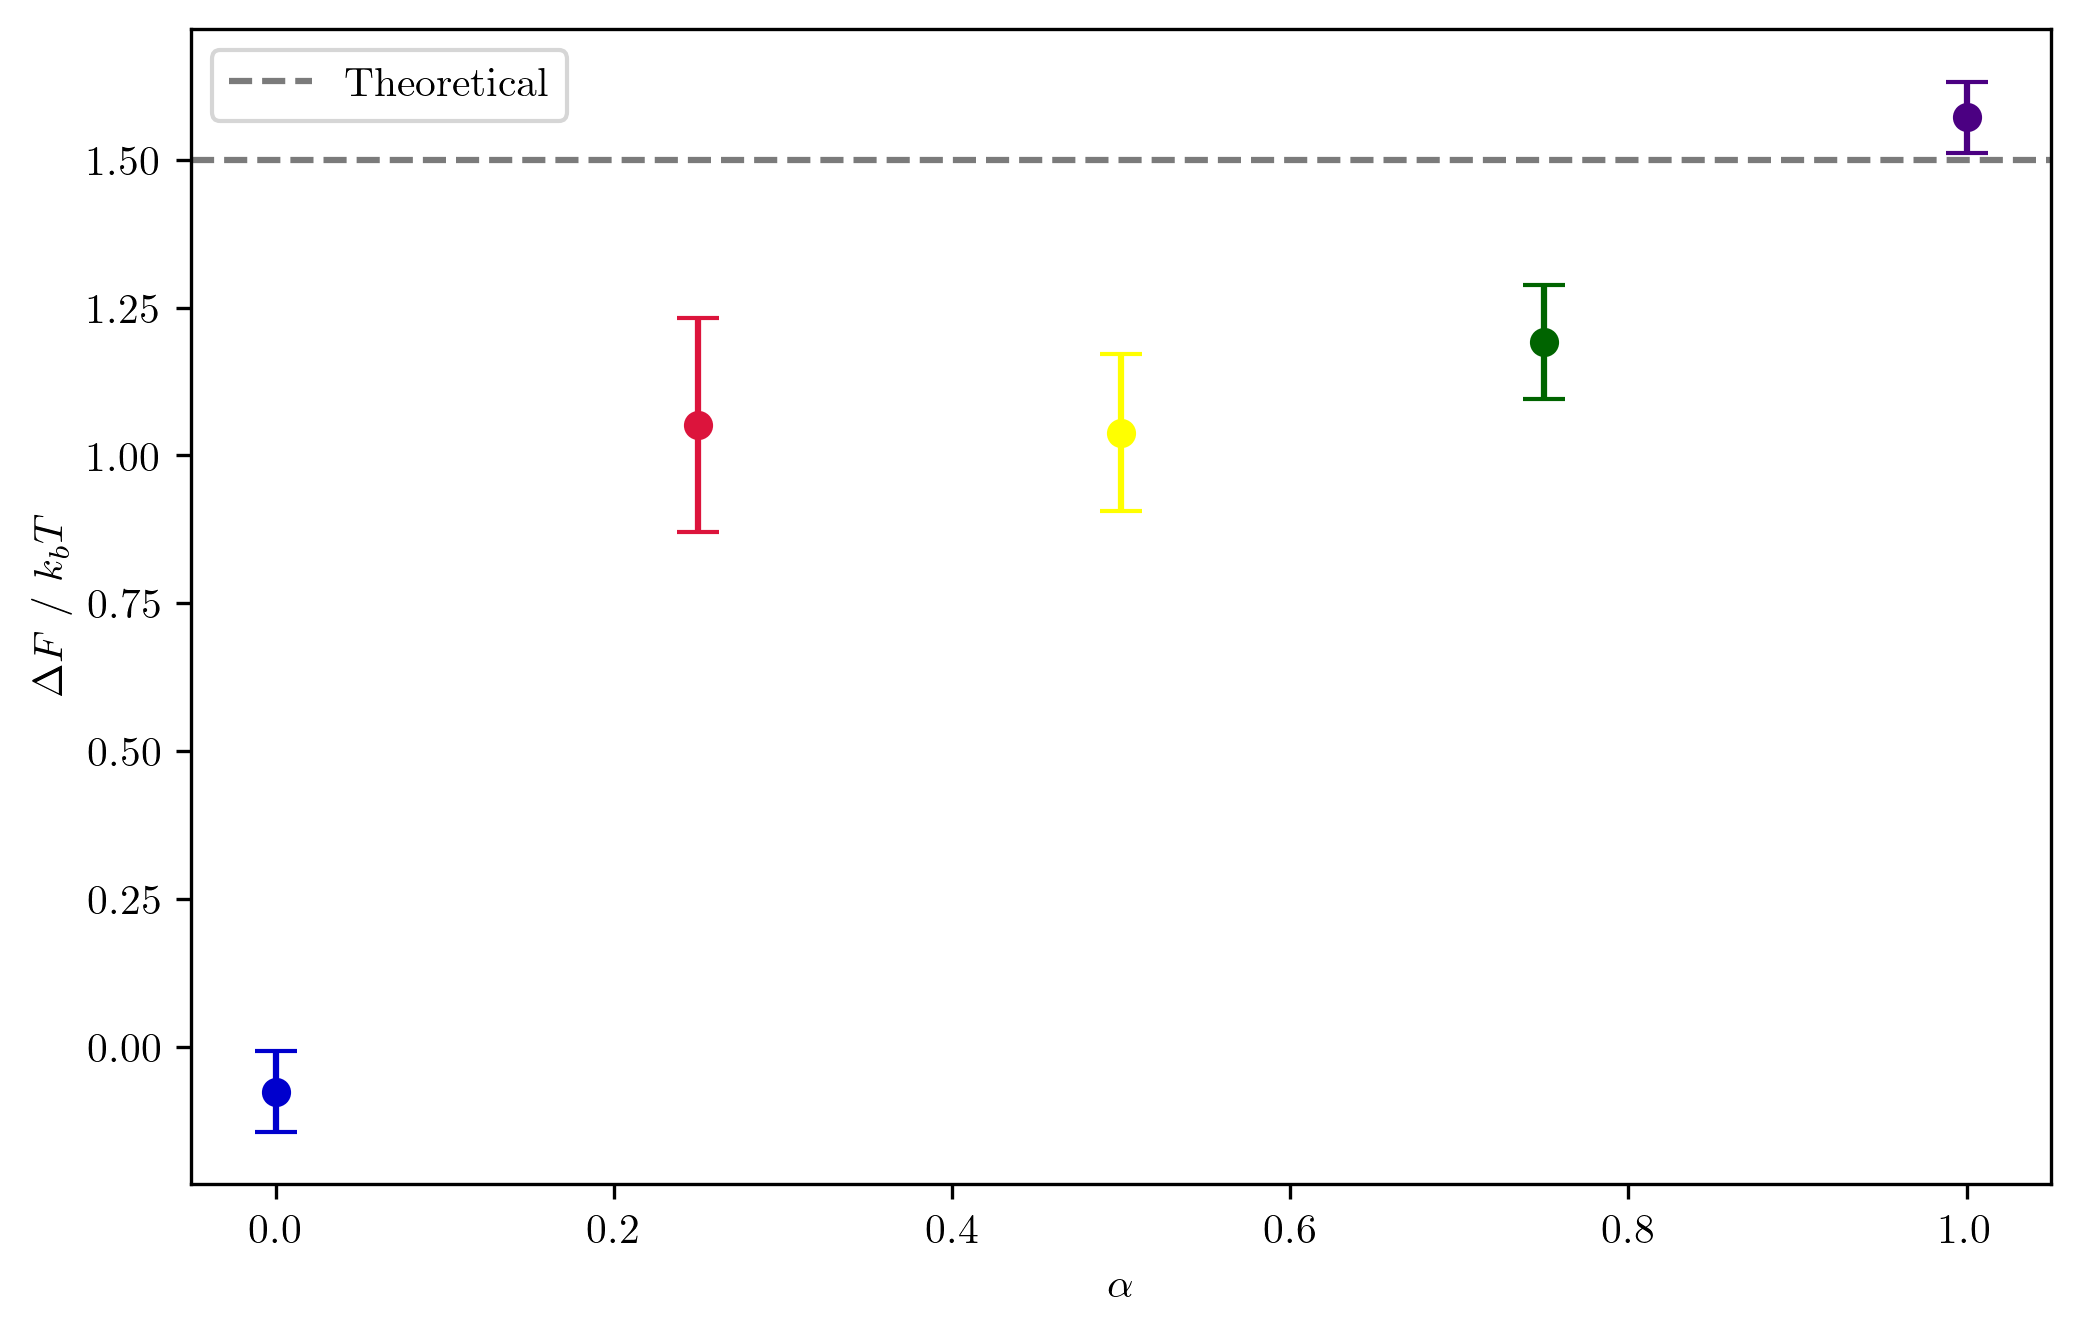

In [18]:
alpha_vals = ["0.00", "0.25", "0.50", "0.75", "1.00"]
color_order = ["C0", "C1", "C4", "C6", "C7"]

dV = 0.50

# Create plot for final mean and SEM across alpha values
plt.figure(figsize=(8, 5))

final_means = []
final_sems = []

for i, color in zip(alpha_vals, color_order):
    _, _, final_mean_alph, final_sem_alphas, _ = plot_avg_free_energy(color=color, data_path=f"/home/n2401517d/my_workspace/HMC_NF/results/algo_2_1000_cycles_dV_0.5_alpha_{i}/avg_free_energy_data.json")
    final_means.append(final_mean_alph)
    final_sems.append(final_sem_alphas)

# Convert alpha strings to floats for x-axis
x_vals = np.array([float(a) for a in alpha_vals])
plt.axhline(y=3*dV, color="C11", linestyle="--", alpha=0.6, label='Theoretical')

# Plot points with corresponding colors from color_order
for x, y, yerr, color in zip(x_vals, final_means, final_sems, color_order):
    plt.errorbar(x, y, yerr=yerr, fmt='o', color=color, capsize=5, capthick=1)

plt.xlabel(r'$\alpha$')
plt.ylabel('$\Delta F$ / $k_bT$')
plt.grid(False)
plt.legend()

# Save plot
output_directory = "/home/n2401517d/my_workspace/HMC_NF/analysis"
base_filename = "final_free_energy_vs_alpha"

# plt.savefig(f'{output_directory}/{base_filename}.svg', bbox_inches='tight')
# plt.savefig(f'{output_directory}/{base_filename}.png', bbox_inches='tight', format='png')
plt.show()


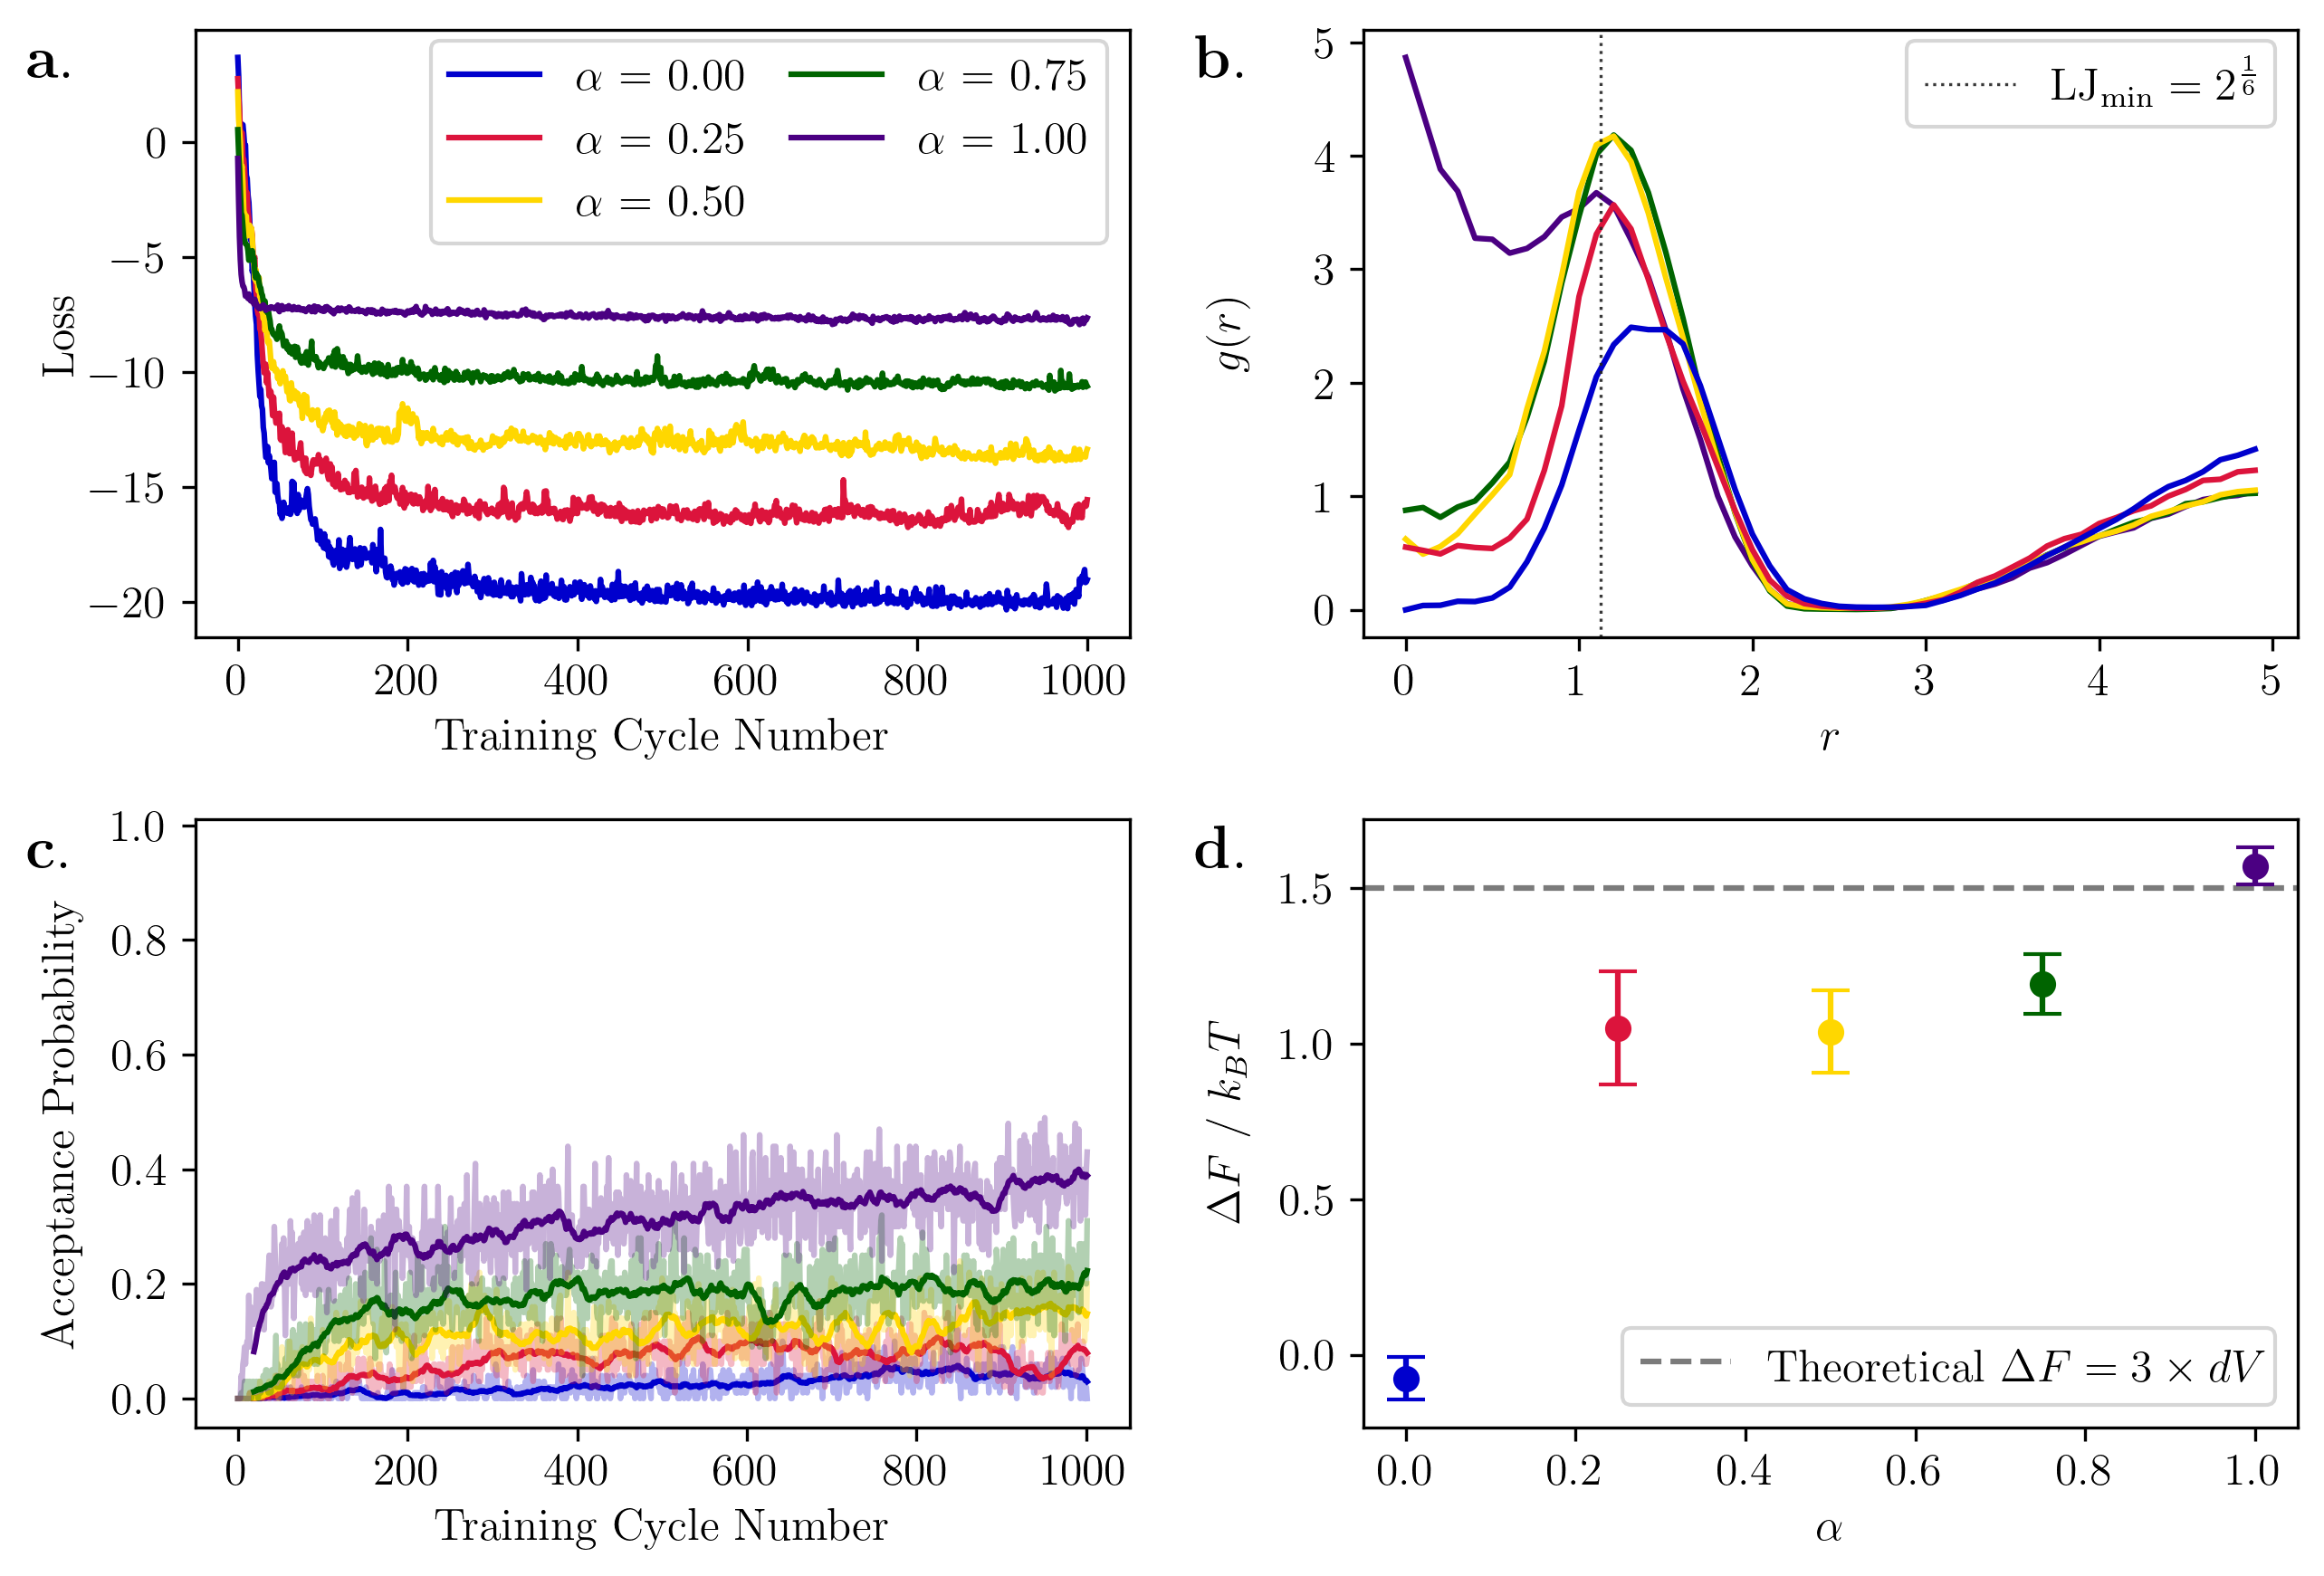

In [34]:
alpha_vals = ["0.00", "0.25", "0.50", "0.75", "1.00"]
color_order = ["C0", "C1", "gold", "C6", "C7"]

# Create a 2x2 subplot figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9, 6))
plt.rcParams.update({'font.size': 12})

# Add subplot labels
ax1.text(-0.18, 0.99, r'$\mathbf{a.}$', transform=ax1.transAxes,
         fontsize=16, va='top', ha='left',
         bbox=dict(facecolor='white', alpha=0.0, edgecolor='none', pad=3))
ax2.text(-0.18, 0.99, r'$\mathbf{b.}$', transform=ax2.transAxes,
         fontsize=16, va='top', ha='left',
         bbox=dict(facecolor='white', alpha=0.0, edgecolor='none', pad=3))
ax3.text(-0.18, 0.99, r'$\mathbf{c.}$', transform=ax3.transAxes,
         fontsize=16, va='top', ha='left',
         bbox=dict(facecolor='white', alpha=0.0, edgecolor='none', pad=3))
ax4.text(-0.18, 0.99, r'$\mathbf{d.}$', transform=ax4.transAxes,
         fontsize=16, va='top', ha='left',
         bbox=dict(facecolor='white', alpha=0.0, edgecolor='none', pad=3))

# Plot 1: Loss functions
for i, color in zip(alpha_vals, color_order):
    loss_path = f"/home/n2401517d/my_workspace/HMC_NF/results/algo_2_1000_cycles_dV_0.5_alpha_{i}/training/loss_function_data.json"
    with open(loss_path, 'r') as f:
        loss_data = json.load(f)
        losses = loss_data['loss_epoch']
        steps = range(len(losses))
        ax1.plot(steps, losses, color=color, label=f'$\\alpha$ = {i}')

ax1.set_xlabel('Training Cycle Number', fontsize=12)
# ax1.set_ylim(-22, 12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.grid(False)
ax1.legend(fontsize=12, ncol=2, columnspacing=1, bbox_to_anchor=(1.0, 1.02), loc='upper right')
ax1.tick_params(labelsize=12)

# Plot 2: Pair correlation functions
for i, color in zip(reversed(alpha_vals), reversed(color_order)):
    pair_corr_path = f"/home/n2401517d/my_workspace/HMC_NF/results/algo_2_1000_cycles_dV_0.5_alpha_{i}/training/pair_correlation_function_1000_data.json"
    with open(pair_corr_path, 'r') as f:
        pair_corr_data = json.load(f)
        r_vals = np.array(pair_corr_data['r'])
        g_r = np.array(pair_corr_data['g_r'])
        ax2.plot(r_vals, g_r, color=color)

ax2.axvline(x=2**(1/6), color='C11', linestyle=':', linewidth=0.8, alpha=0.9, label=r'$\mathrm{LJ}_{\mathrm{min}}=2^{\frac{1}{6}}$')
ax2.set_xlabel(r'$r$', fontsize=12)
ax2.set_ylabel(r'$g(r)$', fontsize=12)
ax2.grid(False)
ax2.legend(fontsize=12, ncol=2, columnspacing=1, bbox_to_anchor=(1.0, 1.02), loc='upper right')
ax2.tick_params(labelsize=12)

# Plot 3: Acceptance rates
window_size = 20
for i, color in zip(alpha_vals, color_order):
    acc_path = f"/home/n2401517d/my_workspace/HMC_NF/results/algo_2_1000_cycles_dV_0.5_alpha_{i}/nf_acceptance_rate_mcmc_steps_data.json"
    with open(acc_path, 'r') as f:
        acc_data = json.load(f)
        acc_rates = acc_data['p_acc_history']
        mcmc_steps = range(len(acc_rates))
        
        ax3.plot(mcmc_steps, acc_rates, color=color, alpha=0.3)
        running_avg = np.convolve(acc_rates, np.ones(window_size)/window_size, mode='valid')
        running_avg_steps = mcmc_steps[window_size-1:]
        ax3.plot(running_avg_steps, running_avg, color=color)

ax3.set_xlabel('Training Cycle Number', fontsize=12)
ax3.set_ylabel('Acceptance Probability', fontsize=12)
ax3.set_ylim(-0.05, 1.01)
ax3.grid(False)
ax3.tick_params(labelsize=12)

# Plot 4: Final free energy vs alpha
dV = 0.50
final_means = []
final_sems = []

for i, color in zip(alpha_vals, color_order):
    _, _, final_mean_alph, final_sem_alphas, _ = plot_avg_free_energy(color=color, data_path=f"/home/n2401517d/my_workspace/HMC_NF/results/algo_2_1000_cycles_dV_0.5_alpha_{i}/avg_free_energy_data.json")
    final_means.append(final_mean_alph)
    final_sems.append(final_sem_alphas)

x_vals = np.array([float(a) for a in alpha_vals])
ax4.axhline(y=3*dV, color="C11", linestyle="--", alpha=0.6, label='Theoretical $\Delta F=3\\times dV$')

for x, y, yerr, color in zip(x_vals, final_means, final_sems, color_order):
    ax4.errorbar(x, y, yerr=yerr, fmt='o', color=color, capsize=5, capthick=1)

ax4.set_xlabel(r'$\alpha$', fontsize=12)
ax4.set_ylabel('$\Delta F$ / $k_BT$', fontsize=12)
ax4.grid(False)
ax4.legend(fontsize=12)
ax4.tick_params(labelsize=12)

plt.tight_layout()
fig.subplots_adjust(left=0.12, bottom=0.11, wspace=0.25, hspace=0.3)

# Align the y-axis labels manually for consistent positioning
for ax in [ax1, ax3]:
    ax.yaxis.set_label_coords(-0.12, 0.5)
for ax in [ax2, ax4]:
    ax.yaxis.set_label_coords(-0.12, 0.5)
# Save plot
output_directory = "/home/n2401517d/my_workspace/HMC_NF/analysis"
base_filename = "mixed_loss_analysis"

plt.savefig(f'{output_directory}/{base_filename}.svg', bbox_inches='tight')
plt.savefig(f'{output_directory}/{base_filename}.png', bbox_inches='tight', format='png')
plt.show()

